In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
# Replace 'air_quality.csv' with the actual path to your dataset
data = pd.read_csv('/content/AQI-and-Lat-Long-of-Countries (1).csv')

# Explore the dataset
print(data.head())

   AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0         51             1               36              0               51   
1         41             1                5              1               41   
2         41             1                5              1               41   
3         66             1               39              2               66   
4         34             1               34              0               20   

       lat      lng  
0  44.7444  44.2031  
1  -5.2900 -44.4900  
2 -11.2958 -41.9869  
3  37.1667  15.1833  
4  53.0167  20.8833  


In [ ]:
X = data.drop(columns=['AQI Value'])
y = data['AQI Value']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")

# Optional: Check model accuracy using correlation between actual and predicted values
accuracy = np.corrcoef(y_test, y_pred)[0, 1] * 100
print(f"Model Accuracy (Correlation-based): {accuracy:.2f}%")

Mean Squared Error (MSE): 41.797808105382074
Root Mean Squared Error (RMSE): 6.465122435451789
Mean Absolute Error (MAE): 4.126360949132347
R-squared (R2 Score): 0.9747980672314599
Model Accuracy (Correlation-based): 98.74%


In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data_path = "/content/AQI-and-Lat-Long-of-Countries (1).csv" # Assuming the file is in the colab environment
data = pd.read_csv(data_path)

# Preview dataset
print("Dataset preview:")
print(data.head())

# Preprocessing
target_column = "AQI Value"
X = data.drop(columns=[target_column])
y = data[target_column]

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns = X.columns)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the AdaBoostRegressor model
model = AdaBoostRegressor(random_state=42) #You can tune hyperparameters here
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")

# Optional: Check model accuracy using correlation between actual and predicted values
accuracy = np.corrcoef(y_test, y_pred)[0, 1] * 100
print(f"Model Accuracy (Correlation-based): {accuracy:.2f}%")

Dataset preview:
   AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0         51             1               36              0               51   
1         41             1                5              1               41   
2         41             1                5              1               41   
3         66             1               39              2               66   
4         34             1               34              0               20   

       lat      lng  
0  44.7444  44.2031  
1  -5.2900 -44.4900  
2 -11.2958 -41.9869  
3  37.1667  15.1833  
4  53.0167  20.8833  
Mean Squared Error (MSE): 145.9274880557116
Root Mean Squared Error (RMSE): 12.080045035334578
Mean Absolute Error (MAE): 9.373013940100497
R-squared (R2 Score): 0.9120132152913437
Model Accuracy (Correlation-based): 95.68%


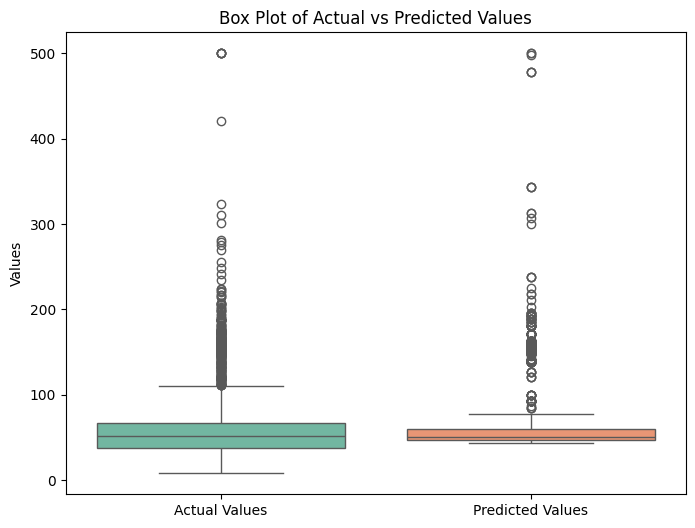

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

# Combine actual and predicted values into a DataFrame for comparison
comparison = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

# Box Plot for Actual vs Predicted Values
plt.figure(figsize=(8, 6))
sns.boxplot(data=comparison, palette="Set2")
plt.title('Box Plot of Actual vs Predicted Values')
plt.ylabel('Values')
plt.show()


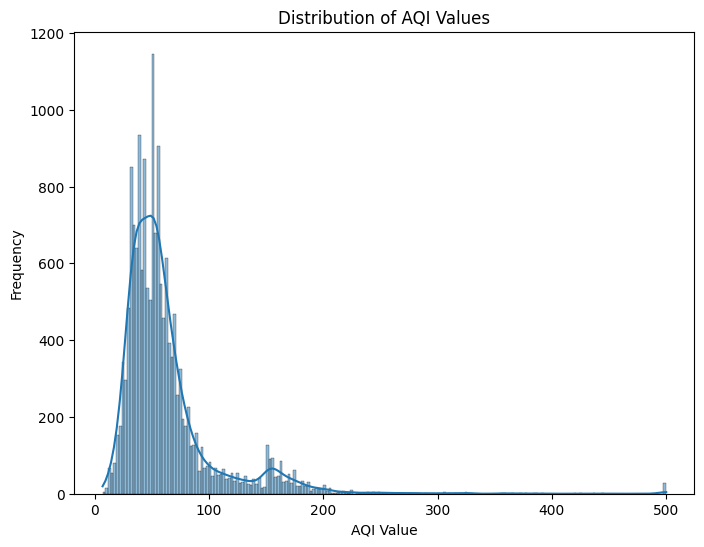

In [ ]:
# Histogram of AQI values
plt.figure(figsize=(8, 6))
sns.histplot(data['AQI Value'], kde=True)
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.title("Distribution of AQI Values")
plt.show()




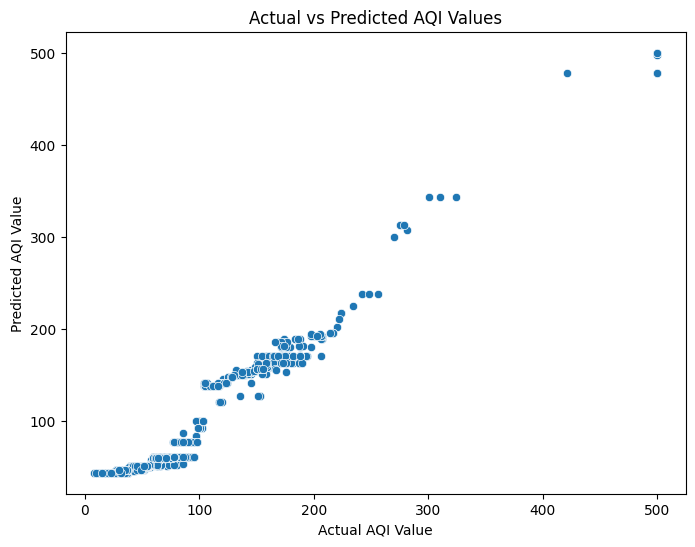

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual AQI Value")
plt.ylabel("Predicted AQI Value")
plt.title("Actual vs Predicted AQI Values")
plt.show()

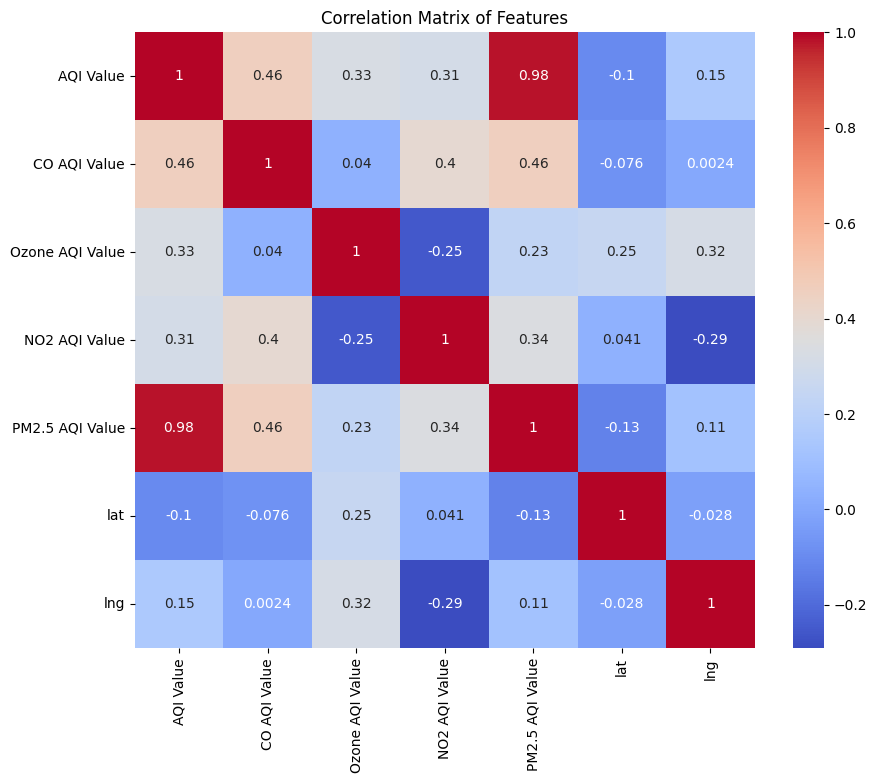

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed